In [1]:
#%matplotlib widget
#%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from numpy import array
import math
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import collections
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from termcolor import colored
import matplotlib.pyplot as plt
import lime
import lime.lime_tabular
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
# Read Training data
train = pd.read_csv('Train.csv', index_col=0, parse_dates=True)
train.head(8)

,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
timestamp,,,,,,,,,,,,,,
2019-02-23 00:00:00,67.92,0.0,55.72,0,-1.56,1.0,26.57,1,19.52,55.04,101.50,2.13,6.30,225.00
2019-02-23 00:05:00,67.89,0.0,55.74,0,-1.51,1.0,26.58,1,19.49,55.17,101.50,2.01,10.46,123.75
2019-02-23 00:10:00,67.86,0.0,55.77,0,-1.47,1.0,26.59,1,19.47,55.30,101.51,1.90,14.63,22.50
2019-02-23 00:15:00,67.84,0.0,55.79,0,-1.42,1.0,26.61,1,19.54,54.20,101.51,2.28,16.08,123.75
2019-02-23 00:20:00,67.81,0.0,55.82,0,-1.38,1.0,26.62,1,19.61,53.09,101.51,2.66,17.52,225.00
2019-02-23 00:25:00,67.78,0.0,55.85,0,-1.33,1.0,26.63,1,19.67,51.91,101.51,2.51,14.69,225.00
2019-02-23 00:30:00,67.76,0.0,55.87,0,-1.28,1.0,26.64,1,19.74,50.72,101.50,2.36,11.85,225.00
2019-02-23 00:35:00,67.73,0.0,55.90,0,-1.24,1.0,26.65,1,19.80,49.54,101.50,2.21,9.02,225.00


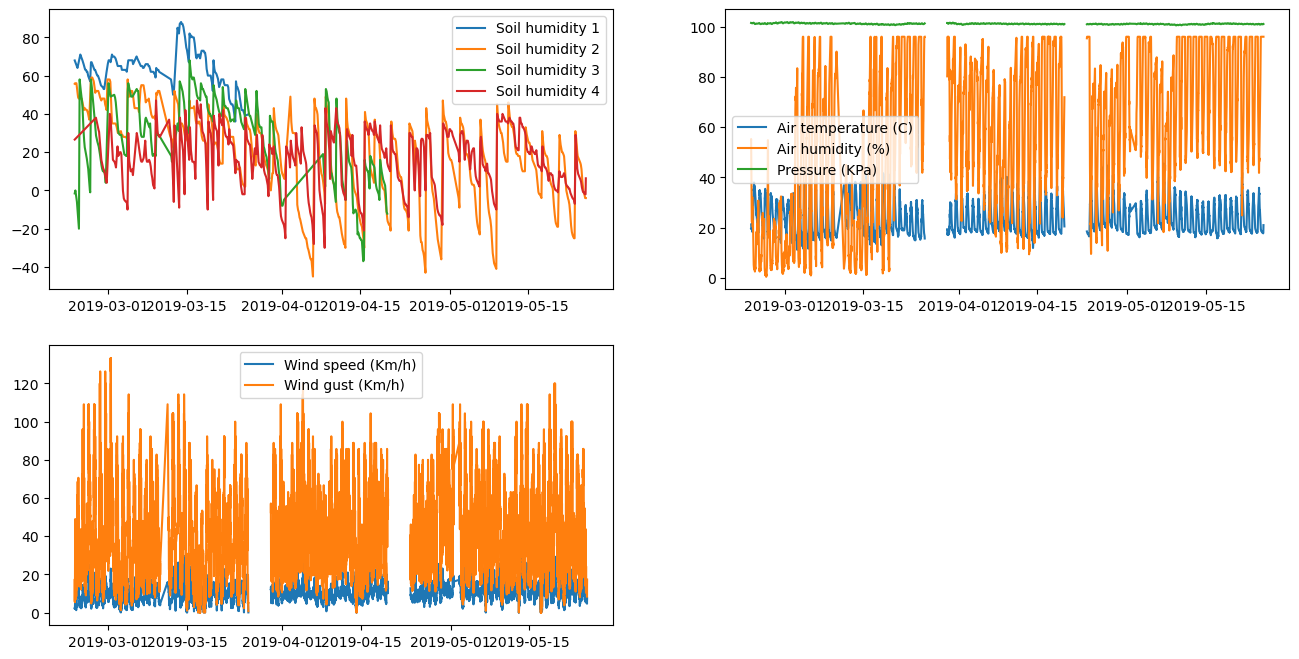

In [3]:
#Plot Training data
fig, ax = plt.subplots(2, 2, figsize=(16, 8))  

ax[0,0].plot(train.index, train[['Soil humidity 1','Soil humidity 2', 'Soil humidity 3','Soil humidity 4']].values)
ax[0,0].legend(['Soil humidity 1','Soil humidity 2', 'Soil humidity 3','Soil humidity 4'])

ax[0,1].plot(train.index, train[['Air temperature (C)', 'Air humidity (%)', 'Pressure (KPa)']].values)
ax[0,1].legend(['Air temperature (C)', 'Air humidity (%)', 'Pressure (KPa)'])

ax[1,0].plot(train.index, train[['Wind speed (Km/h)', 'Wind gust (Km/h)']].values)
ax[1,0].legend(['Wind speed (Km/h)', 'Wind gust (Km/h)'])

fig.delaxes(ax[1,1])

In [4]:
train.describe()

,Soil humidity 1,Irrigation field 1,Soil humidity 2,Irrigation field 2,Soil humidity 3,Irrigation field 3,Soil humidity 4,Irrigation field 4,Air temperature (C),Air humidity (%),Pressure (KPa),Wind speed (Km/h),Wind gust (Km/h),Wind direction (Deg)
count,8917.000000,10066.000000,26301.000000,26710.000000,16086.000000,17236.000000,26302.000000,26710.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000
mean,63.025653,0.177727,18.766447,0.093036,25.046062,0.245243,17.512161,0.211606,24.263780,58.521052,101.131418,9.896898,41.744905,93.983796
std,9.801099,0.382302,22.904850,0.290489,19.998016,0.430243,14.248309,0.408455,6.756751,30.073448,0.218448,4.325666,24.168987,100.502500
min,36.000000,0.000000,-45.000000,0.000000,-38.000000,0.000000,-30.000000,0.000000,11.220000,0.590000,100.500000,0.000000,0.000000,0.000000
25%,58.210000,0.000000,3.850000,0.000000,10.220000,0.000000,8.000000,0.000000,18.580000,33.980000,100.980000,6.830000,21.820000,22.500000
50%,63.000000,0.000000,23.000000,0.000000,26.610000,0.000000,19.600000,0.000000,22.150000,61.310000,101.120000,9.530000,37.240000,22.500000
75%,68.000000,0.000000,35.310000,0.000000,41.360000,0.000000,29.050000,0.000000,29.590000,86.360000,101.260000,12.460000,59.275000,180.000000
max,88.000000,1.000000,59.000000,1.000000,68.000000,1.000000,47.000000,1.000000,45.560000,96.000000,101.860000,31.360000,133.330000,337.500000


In [5]:
print(train.isna().sum())
print("The shape of data is {}".format(train.shape))

Soil humidity 1         17793
Irrigation field 1      16644
Soil humidity 2           409
Irrigation field 2          0
Soil humidity 3         10624
Irrigation field 3       9474
Soil humidity 4           408
Irrigation field 4          0
Air temperature (C)      2715
Air humidity (%)         2715
Pressure (KPa)           2715
Wind speed (Km/h)        2715
Wind gust (Km/h)         2715
Wind direction (Deg)     2715
dtype: int64
The shape of data is (26710, 14)


In [6]:
## too much of na values in last columns
train = train.dropna(subset=['Air temperature (C)','Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)','Wind gust (Km/h)','Wind direction (Deg)'])
train.isna().sum()

Soil humidity 1         15081
Irrigation field 1      15081
Soil humidity 2             0
Irrigation field 2          0
Soil humidity 3          9065
Irrigation field 3       9065
Soil humidity 4             0
Irrigation field 4          0
Air temperature (C)         0
Air humidity (%)            0
Pressure (KPa)              0
Wind speed (Km/h)           0
Wind gust (Km/h)            0
Wind direction (Deg)        0
dtype: int64

In [7]:
train.shape

(23995, 14)

In [8]:
# get the month and hour
train['Month'] = train.index.strftime('%m')
train['Hour'] = train.index.strftime('%H')

In [9]:
## Prepare the data Seperately
field_1 = train[['Soil humidity 1','Irrigation field 1','Air temperature (C)','Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)','Wind gust (Km/h)','Wind direction (Deg)','Month','Hour']]

field_2 = train[['Soil humidity 2','Irrigation field 2','Air temperature (C)','Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)','Wind gust (Km/h)','Wind direction (Deg)','Month','Hour']]

field_3 = train[['Soil humidity 3','Irrigation field 3','Air temperature (C)','Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)','Wind gust (Km/h)','Wind direction (Deg)','Month','Hour']]

field_4 = train[['Soil humidity 4','Irrigation field 4','Air temperature (C)','Air humidity (%)','Pressure (KPa)','Wind speed (Km/h)','Wind gust (Km/h)','Wind direction (Deg)','Month','Hour']]


In [10]:
df = pd.DataFrame()
df['field_1']= field_1['Soil humidity 1'].values
df['field_2']= field_2['Soil humidity 2'].values
df['field_3']= field_3['Soil humidity 3'].values
df['field_4']= field_4['Soil humidity 4'].values

df.corr()

,field_1,field_2,field_3,field_4
field_1,1.000000,0.386280,0.307402,0.087219
field_2,0.386280,1.000000,0.477415,0.532469
field_3,0.307402,0.477415,1.000000,0.366100
field_4,0.087219,0.532469,0.366100,1.000000


In [11]:
# let us the correlation between al these values
import plotly.express as px
import plotly.figure_factory as ff

corr = df.corr()
fig = ff.create_annotated_heatmap(
    z=corr.to_numpy().round(2),
    x=list(corr.index.values),
    y=list(corr.columns.values),       
    xgap=3, ygap=3,
    zmin=-1, zmax=1,
    colorscale='earth',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)
fig.update_layout(
                # title_text='<b>Correlation Matrix (cont. features)<b>',
                #   title_x=0.5,
                  titlefont={'size': 24},
                  width=550, height=550,
                  xaxis_showgrid=False,
                  xaxis={'side': 'bottom'},
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',                   
                  paper_bgcolor=None,
                  )
fig.show()

<Axes: >

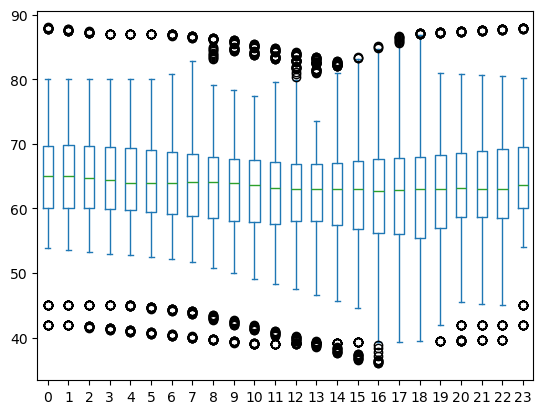

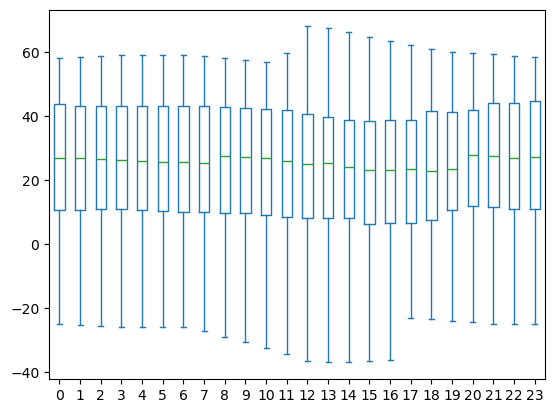

In [12]:
field_1.set_index(field_1.index.hour, append=True)['Soil humidity 1'].unstack().plot.box()
field_3.set_index(field_3.index.hour, append=True)['Soil humidity 3'].unstack().plot.box()

<Axes: >

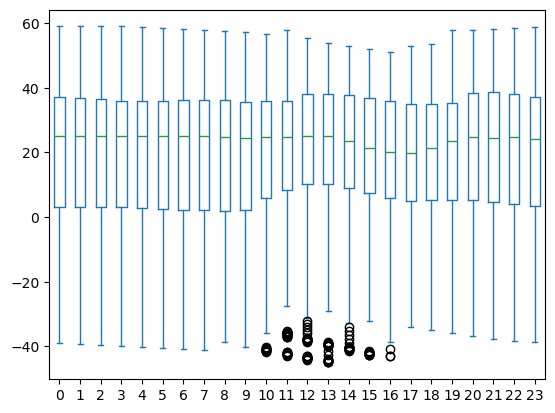

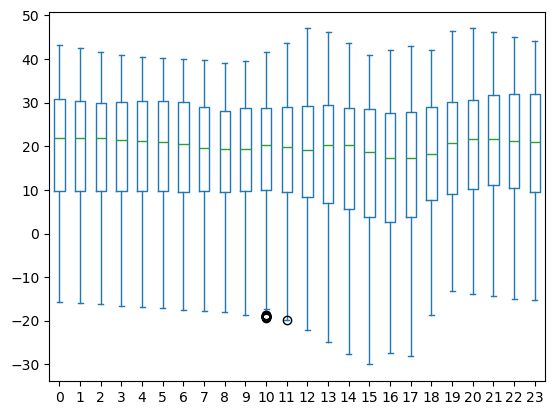

In [13]:
## pattern

field_2.set_index(field_2.index.hour, append=True)['Soil humidity 2'].unstack().plot.box()
field_4.set_index(field_4.index.hour, append=True)['Soil humidity 4'].unstack().plot.box()


In [20]:
# lets fill these values by their hourly median

#field_1 = field_1.groupby("Hour").transform(lambda x: x.fillna(x.median()))

# Make sure the column is numeric
field_1["Irrigation field 1"] = pd.to_numeric(field_1["Irrigation field 1"], errors='coerce')

# Fill missing values using hourly median
field_1["Irrigation field 1"] = field_1.groupby("Hour")["Irrigation field 1"].transform(lambda x: x.fillna(x.median()))


field_3["Irrigation field 3"] = pd.to_numeric(field_3["Irrigation field 3"], errors='coerce')
field_3["Irrigation field 3"] = field_3.groupby("Hour")["Irrigation field 3"].transform(lambda x: x.fillna(x.median()))


#field_3 = field_3.groupby("Hour").transform(lambda x: x.fillna(x.median()))
#field_3["Irrigation field 3"] = field_3.groupby("Hour").transform(lambda x: x.fillna(x.median()))


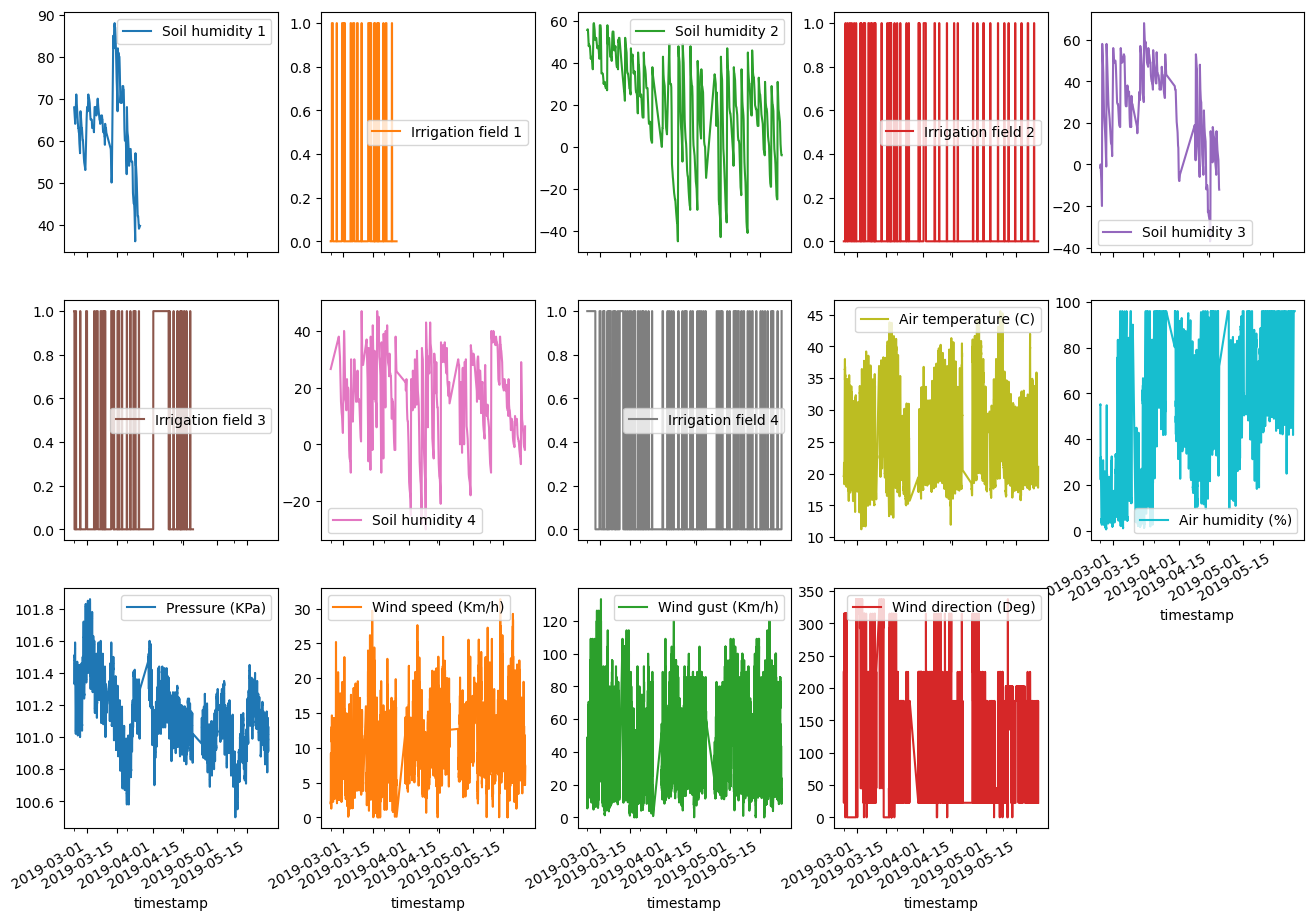

In [21]:
#let's recheck the features
plt.rcParams['figure.figsize'] = (16, 12)
train.plot(subplots=True, layout=(3,5))
plt.show()

In [22]:
train.isna().sum()

Soil humidity 1         15081
Irrigation field 1      15081
Soil humidity 2             0
Irrigation field 2          0
Soil humidity 3          9065
Irrigation field 3       9065
Soil humidity 4             0
Irrigation field 4          0
Air temperature (C)         0
Air humidity (%)            0
Pressure (KPa)              0
Wind speed (Km/h)           0
Wind gust (Km/h)            0
Wind direction (Deg)        0
Month                       0
Hour                        0
dtype: int64

In [23]:
def prepare_data(target, window_size = 4):
    
    # reset the index and drop time
    target['Hour'] = target.index.strftime('%H')
    target = target.reset_index(drop=True)
    target['Hour'] = target['Hour'].astype(float)
    target['Month'] = target['Month'].astype(float)

    # Compute differential of pressure
    target['pressure'] = target['Pressure (KPa)']   
    target['pressure_last'] = target[['pressure']].shift(1)
    target['diff_pressure'] = target['pressure'] - target['pressure_last']    
    target['diff_pressure'].fillna(np.mean(target['diff_pressure']), inplace=True) 
    
    # Compute differential of temperature
    target['temperature'] = target['Air temperature (C)']
    target['temperature_last'] = target[['temperature']].shift(1)
    target['diff_temperature'] = target['temperature'] - target['temperature_last']
    target['diff_temperature'].fillna(np.mean(target['diff_temperature']), inplace=True) 
    
    # Do cyclic encoding of the month and hour
    target['hour_sin'] = np.sin(2 * np.pi * target['Hour']/23.0)
    target['hour_cos'] = np.cos(2 * np.pi * target['Hour']/23.0)
    
    target['month_sin'] = np.sin(2 * np.pi * target['Month']/12.0)
    target['month_cos'] = np.cos(2 * np.pi * target['Month']/12.0)
    
       
    # Remove all the rest temperature and pressure
    del target['Air temperature (C)']
    del target['temperature_last']  
    del target['temperature']
    
    del target['Pressure (KPa)']
    del target['pressure_last'] 
    del target['pressure'] 
    
    del target['Hour']
    del target['Month']
    
   
    # Y is the change of humidity and X are all the values
    Y = target.iloc[:,0].values   
    X = target.iloc[:,1:].values
    
    # reshaping for multidimensional array of output
    median = np.median(Y)
    y = [(Y[i]) for i in range(window_size-1)]
    y_ = []
    for i in y:
        l = []
        l.append(i)
        for times in range(window_size-1):
            l.append(median)
        y_.append(tuple(l))
    
    # Get the past values for rest of them
    if window_size == 4:
        Y = [(Y[i],Y[i-1],Y[i-2],Y[i-3]) for i in range((window_size - 1), len(Y))]
    else:
        Y = [(Y[i],Y[i-1],Y[i-2],Y[i-3],Y[i-4],Y[i-5]) for i in range((window_size - 1), len(Y))]
        
    # combine it    
    y = y_ + Y
    y = np.array(y)
    
    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
    
    
    # Normalisation after min and max scaling
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    y_train = scaler.fit_transform(y_train)
    X_test = scaler.fit_transform(X_test)
    y_test = scaler.fit_transform(y_test)

    return X_train, X_test, y_train, y_test


In [24]:
class regression():
    """
    This is done here for doing regression and showing the output of regression with the help of parameters
    """

    def __init__(self,  X_train, X_test, y_train, y_test):
       '''
       Inititialise the parameters with class parameters
       '''

       # Making into a class variable and giving proper shape by splitting
       self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test

       # Making a dataframe to store model results
       self.results = pd.DataFrame(columns=['Model','MAE','MSE','RMSE','R_Squared'])

       # Getting the cols
       print(colored('The len of train data is {}'.format(len(self.X_train)),color = 'yellow', attrs=['bold']))
       print(colored('The len of test data is {}'.format(len(self.X_test)),color = 'yellow', attrs=['bold']))

    
    def result_plots(self,model):

        '''
        This method shows the residual and error distribution plots of the regression parameters
        along with results of each model
        '''
        # Visualise the results in dataset of "test"
        print(colored("The results of your model are:",color = 'yellow', attrs=['bold']))
        print(display(HTML(self.results.to_html())))

    
    def metric_calc(self, model_name):

        # Calculate metrics and append it
        print()
        print(colored("The metrics of regression are :",color = 'green', attrs=['bold']))
        mae  = metrics.mean_absolute_error(self.y_test, self.pred)
        mse  = metrics.mean_squared_error(self.y_test, self.pred)
        rmse = np.sqrt(metrics.mean_squared_error(self.y_test, self.pred))
        r2   = metrics.r2_score(self.y_test, self.pred)
        
        # print the metrics
        print('Mean Absolute Error:', mae)
        #print('Mean Absolute Percentage Error:', mape)
        print('Mean Squared Error:',  mse)
        print('Root Mean Squared Error:', rmse)
        print('R Squared:', r2)

        self.results = self.results.append({'Model':model_name,'MAE':mae,'MSE':mse,'RMSE':rmse,'R_Squared':r2}, ignore_index=True)
        
        plt.rcParams['figure.figsize'] = (10, 6)
        plt.scatter(self.y_test, self.pred, alpha=0.5)
        plt.xlabel("test data", fontsize=20)
        plt.ylabel("prediction", fontsize=20)
        plt.show()
        
        

    def multioutput_regression(self):
        
        print(colored("Performing modelling for MultiOutput",color = 'yellow', attrs=['bold']))
        # Let us go with a linear regression model for simple analysis
        model = MultiOutputRegressor(Ridge(random_state=123)).fit(self.X_train, self.y_train)

        # Generate model summary
        #print(model.summary())

        # Let us predict and see the accuracy
        self.pred = model.predict(self.X_test)
        self.metric_calc("Linear Regression")

        # Returning model
        return model


    def random_forest(self):
   
        print(colored("Performing modelling for Random forest",color = 'yellow', attrs=['bold']))
        # Create Random Forest Model
        rf_model = RandomForestRegressor()
        # Specifying hyperparams for the search
        param_grid = {
                'criterion': ['mse'],
                'n_estimators': [10,20, 25],
                'max_depth':    [15, 10 ,15],
                'min_samples_split': [10, 15],
                'min_samples_leaf' : [2,5],
                'bootstrap': [True, False]
                }
        # Fit the model and find best hyperparams
        grid_model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
        grid_model.fit(self.X_train,self.y_train)

        # Fit the model with best params
        #print()
        #print("Best parameters =", grid_model.best_params_)
        model_clf = rf_model.set_params(**grid_model.best_params_)
        model_clf.fit(self.X_train, self.y_train)
    
        ## reviewing the results
        cv_results = pd.DataFrame(grid_model.cv_results_)
        #print(cv_results)
        
        # Time to test the model
        self.pred = model_clf.predict(self.X_test)
        self.metric_calc("Random Forest")

        # Returning model
        return model_clf

    def XG_Boost(self):
   
        print(colored("Performing modelling for XG Boost Regressor",color = 'yellow', attrs=['bold']))
        # Create XG Boost Model
        rf_model = XGBRegressor(n_estimators=2000, max_depth=20, learning_rate=0.01)
        rf_model = MultiOutputRegressor(rf_model)

        rf_model.fit(self.X_train,self.y_train)

        # Time to test the model
        self.pred = rf_model.predict(self.X_test)
        self.metric_calc("XG Boost")

        # Returning model
        return rf_model
 
    